In [1]:
from src.train_convex_experiment import TrainExperiment
import matplotlib.pyplot as plt
from src.prepare import prepare
import seaborn as sns

##### Investigate the convexness of iDLG

In [2]:
iid_client_train_loader, device, criterion, validation_loader, train_loader, clients_dataset, global_model = prepare()
trainer = TrainExperiment(
            global_model=global_model,
            num_local_epochs=1,
            lr =  5e-3,
            criterion=criterion,
            client_dataloader=iid_client_train_loader[1],
            device=device,
            filtered_train_dataset=clients_dataset[1],
            prune=False,
            alpha=None
)

no_defense_grad_diffs, no_defense_pnsr_vals, no_defense_ssim_vals = trainer.train_and_attack()

Files already downloaded and verified
Files already downloaded and verified


In [3]:
iid_client_train_loader, device, criterion, validation_loader, train_loader, clients_dataset, global_model = prepare()
trainer = TrainExperiment(
            global_model=global_model,
            num_local_epochs=1,
            lr =  5e-3,
            criterion=criterion,
            client_dataloader=iid_client_train_loader[1],
            device=device,
            filtered_train_dataset=clients_dataset[1],
            prune=True,
            alpha=0.05
)

plgp_defense_grad_diffs, plgp_psnr_vals, plgp_ssim_vals = trainer.train_and_attack()

Files already downloaded and verified
Files already downloaded and verified


/Users/albertmoller/anaconda3/envs/FederatedLearning/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/albertmoller/anaconda3/envs/FederatedLearning/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


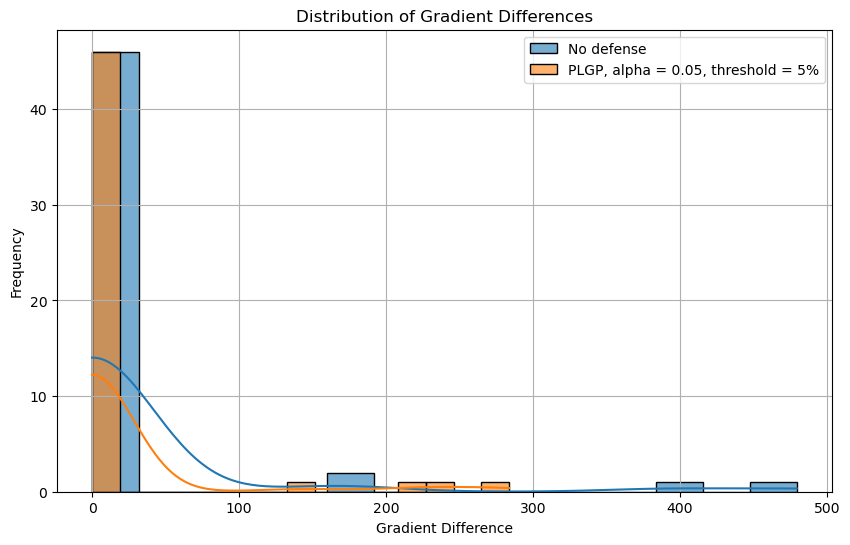

In [9]:
blue_color = '#1f77b4'
orange_color = '#ff7f0e'

plt.figure(figsize=(10, 6))

sns.histplot(no_defense_grad_diffs, bins=15, kde=True, color=blue_color, label='No defense', edgecolor='black', alpha=0.6)

sns.histplot(plgp_defense_grad_diffs, bins=15, kde=True, color=orange_color, label='PLGP, alpha = 0.05, threshold = 5%', edgecolor='black', alpha=0.6)

plt.title('Distribution of Gradient Differences')
plt.xlabel('Gradient Difference')
plt.ylabel('Frequency')

plt.legend()
plt.grid(True)

plt.show()

/Users/albertmoller/anaconda3/envs/FederatedLearning/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/albertmoller/anaconda3/envs/FederatedLearning/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/albertmoller/anaconda3/envs/FederatedLearning/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/albertmoller/anaconda3/envs/FederatedLearning/lib/python3.9/site-packages/seaborn

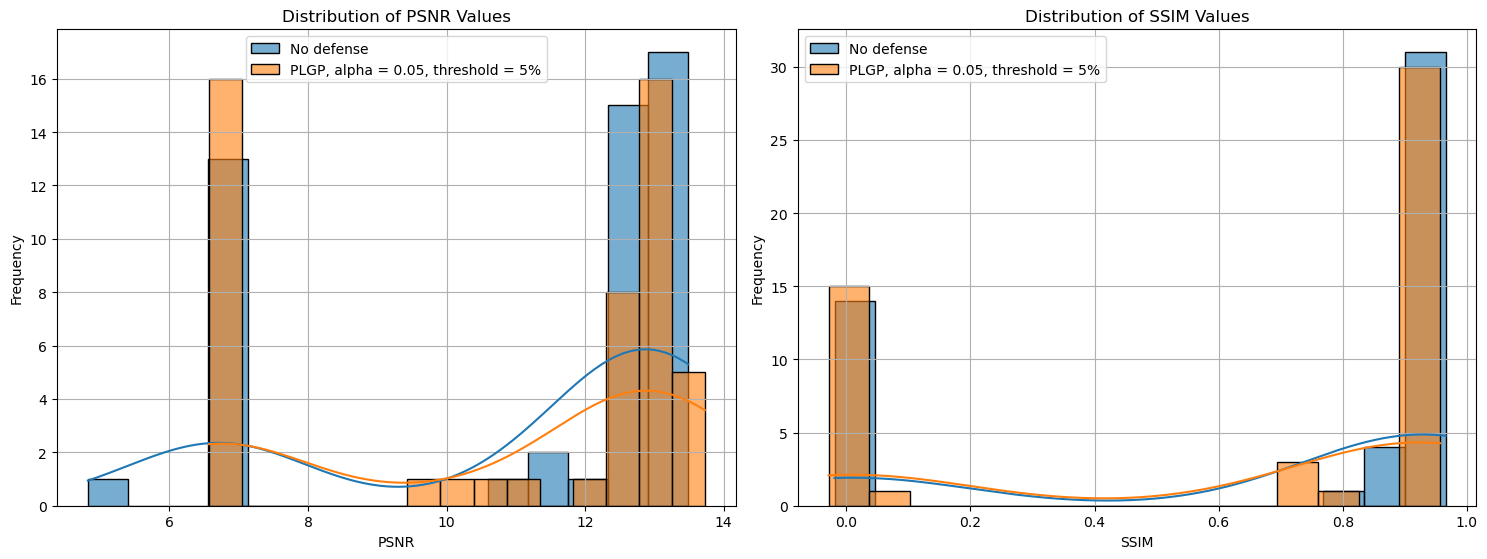

In [7]:
blue_color = '#1f77b4'
orange_color = '#ff7f0e'

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(no_defense_pnsr_vals, bins=15, kde=True, color=blue_color, label='No defense', edgecolor='black', alpha=0.6, ax=axes[0])
sns.histplot(plgp_psnr_vals, bins=15, kde=True, color=orange_color, label='PLGP, alpha = 0.05, threshold = 5%', edgecolor='black', alpha=0.6, ax=axes[0])
axes[0].set_title('Distribution of PSNR Values')
axes[0].set_xlabel('PSNR')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

sns.histplot(no_defense_ssim_vals, bins=15, kde=True, color=blue_color, label='No defense', edgecolor='black', alpha=0.6, ax=axes[1])
sns.histplot(plgp_ssim_vals, bins=15, kde=True, color=orange_color, label='PLGP, alpha = 0.05, threshold = 5%', edgecolor='black', alpha=0.6, ax=axes[1])
axes[1].set_title('Distribution of SSIM Values')
axes[1].set_xlabel('SSIM')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()